#### **Import Libs**

In [38]:
import pandas as pd
import numpy as np
import optuna
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


#### **Getting training && validation data**

In [39]:
table = pd.read_csv('../databases/dermatology.csv')

data = np.array(table)
# Remove a primeira coluna dos dados, que não contém informações relevantes para o modelo.
data = data[:, 1:]

labels = []
for line in range(data.shape[0]):
  if(labels.count(data[line, data.shape[1]-1])==0):
    labels.append(data[line, data.shape[1]-1])

scaler = StandardScaler()
# Extrai as classes dos dados e converte-as em variáveis dummy, usando a função pd.get_dummies do Pandas.
y = np.array(pd.get_dummies(data[:, data.shape[1]-1])).astype(np.float32)
# O resultado é um array binário para cada classe, indicando se uma amostra pertence ou não a essa classe.

# Escala os dados usando StandardScaler (garantir que todas as variáveis tenham a mesma ordem de grandeza)
X = (data[:, :(data.shape[1]-1)]).astype(np.float32)

scaler.fit(X) 
# Divide os dados em três subconjuntos de treinamento, validação e teste, usando a função train_test_split do Scikit-Learn. A divisão é feita na proporção de 60% para treinamento, 20% para validação e 20% para teste.
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25)

#### **Model Visualization**

In [40]:
model = joblib.load('../raw_models/mlp_model_1.pkl')
y_pred = model.predict(X_test)

d:\MiniConda\envs\DataScience\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
d:\MiniConda\envs\DataScience\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
d:\MiniConda\envs\DataScience\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: T

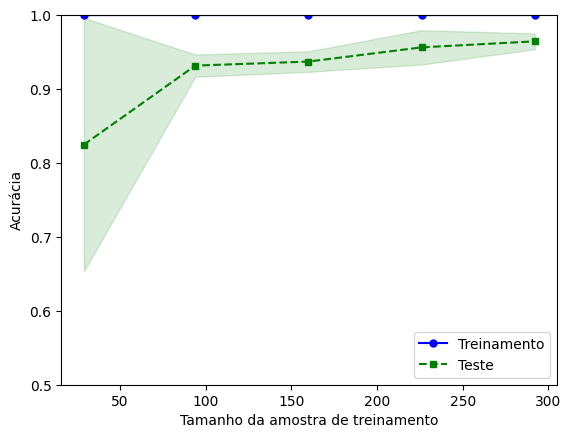

In [41]:
# Calcula a curva de aprendizado
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# Calcula a média e o desvio padrão das pontuações de treinamento e teste
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plota a curva de aprendizado
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Treinamento')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Teste')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Tamanho da amostra de treinamento')
plt.ylabel('Acurácia')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.0])
plt.show()

0
1
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
1


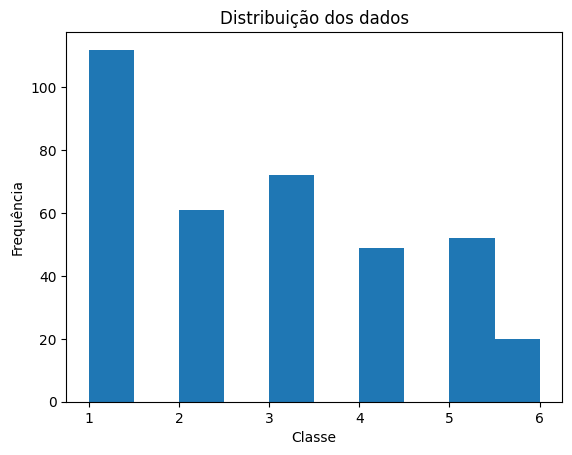

In [52]:
import matplotlib.pyplot as plt

newY = []
for i in range(len(y)):
    for j in range(len(y[i])):
        print(int(y[i][j]))
        if int(y[i][j]) == 1:
            newY.append(j+1)
plt.hist(newY)
plt.title('Distribuição dos dados')
plt.xlabel('Classe')
plt.ylabel('Frequência')
plt.show()